In [73]:
import numpy as np
from matplotlib import pyplot as plt

In [74]:
def add_noise(y):
    """
    Adds random noise to a set of points
    """
    noise_func = np.vectorize(lambda x: x + np.random.uniform(-np.max(y)/4, np.max(y)/4, 1))
    return noise_func(y)

In [75]:
def generate_points(start, stop, number, a=3.65, b=6.7, c=12.8):
    """
    Generates points along a line with the equation
    y = ax^2 + bx + c (parent function)
    """
    x = np.linspace(start, stop, num=number)
    quadratic_function = np.vectorize(lambda x: a*x**2 + b*x + c)
    y = quadratic_function(x)
    return (x, y)

In [76]:
def get_y_values(X, a=None, b=None, c=None):
   
    return a*X**2 + b*X + c

In [77]:
## Generate 20 points on a line with x values between 1 and 30
## with a = 0.6, b = 10 and c = 30
X, _Y = generate_points(1, 10, 100, a=0.6, b=10, c=30)
## Add random noise to the y values
Y = add_noise(_Y)

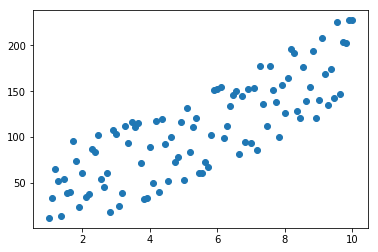

In [78]:
plt.scatter(X, Y)

In [79]:
def get_meanSquare_gradients_mse(X, Y, Y_hat):
    """
    returns gradients for the three variables a, b and c assuming mean square error
    for an equation y = ax^2 + bx + c
    """
    # dL/da
    a_gradient = np.sum(2*X**2*(Y_hat - Y), dtype=np.int32)/len(Y) ### Try removing the normalization factor len(Y)
    # dL/db
    b_gradient = np.sum(2*X*(Y_hat - Y), dtype=np.int32)/len(Y)
    # dL/dc
    c_gradient = np.sum(2*(Y_hat - Y))/len(Y)
    return a_gradient, b_gradient, c_gradient

Estimates after 100 iterations: a = 1.3623, b = 6.46151, c = 12.7822203808


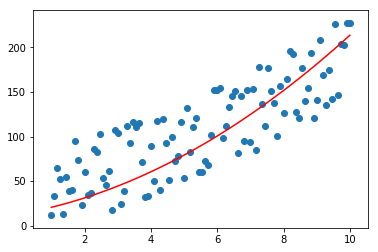

In [83]:
# Initial Values
a = 3.65
b = 6.7
c = 12.8
# Learning rate
alpha = 0.00001
# Number of iterations
N = 100
for i in range(N):
    Y_hat = get_y_values(X, a, b, c)
    a_grad, b_grad, c_grad = get_meanSquare_gradients_mse(X, Y, Y_hat)
    # update a,b and c for the next iteration
    a = a - alpha * a_grad
    b = b - alpha * b_grad
    c = c - alpha * c_grad
# The final value of 
plt.plot(X, get_y_values(X, a, b, c), 'r')
plt.scatter(X, Y)
print "Estimates after {} iterations: a = {}, b = {}, c = {}".format(N, a, b, c)

In [81]:
#Extra Credit

def get_meanSquareLog_gradients_mse(X, Y, Y_hat):
    """
    returns gradients for the three variables a, b and c assuming mean square log error
    for an equation y = ax^2 + bx + c
    """
       
    # dL/da
    a_gradient = np.sum(2*X**2*(np.log1p(Y_hat+1) - np.log1p(Y+1)), dtype=np.int32)/len(Y) ### Try removing the normalization factor len(Y)
    # dL/db
    b_gradient = np.sum(2*X*(np.log1p(Y_hat+1) - np.log1p(Y+1)), dtype=np.int32)/len(Y)
    # dL/dc
    c_gradient = np.sum(2*(np.log1p(Y_hat+1) - np.log1p(Y+1)), dtype=np.int32)/len(Y)
    return a_gradient, b_gradient, c_gradient

Estimates after 100 iterations: a = 1.4407, b = 2.745, c = 4.81


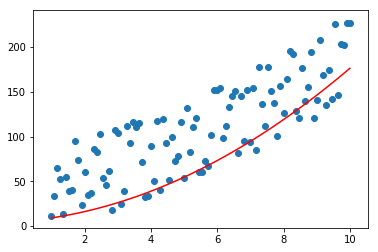

In [82]:
# Initial Values
a = 1.2
b = 2.7
c = 4.8
# Learning rate
alpha = 0.0001
# Number of iterations
N = 100
for i in range(N):
    Y_hat = get_y_values(X, a, b, c)
    a_grad, b_grad, c_grad = get_meanSquareLog_gradients_mse(X, Y, Y_hat)
    # update a,b and c for the next iteration
    a = a - alpha * a_grad
    b = b - alpha * b_grad
    c = c - alpha * c_grad
# The final value of 
plt.plot(X, get_y_values(X, a, b, c), 'r')
plt.scatter(X, Y)
print "Estimates after {} iterations: a = {}, b = {}, c = {}".format(N, a, b, c)